In [1]:
!pip install duckdb

In [2]:
import duckdb
import pandas as pd

In [3]:
df_estados = pd.read_csv('raw_data/estado_regiao.csv', encoding='iso-8859-1', delimiter=';')

In [4]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [5]:
df_respondentes = pd.read_csv('raw_data/respondentes_pesquisa.csv', encoding='iso-8859-1', delimiter='|', decimal='.')

In [6]:
df_respondentes.head()

,cod_pessoa,genero,data_nascimento,educacao,renda_mensal,peso,colesterol,estado_civil,id_estado
0,10141743,Masculino,1981-04-25,Pós-Graduação,1000-3000,61.018446,96.777322,Viúvo,19
1,10141860,Feminino,1966-01-19,Ensino Médio,> 5000,108.557401,176.108130,Viúvo,1
2,10142548,Masculino,1973-08-02,Pós-Graduação,> 5000,112.349921,144.110224,Casado,19
3,10142591,Masculino,1997-03-05,Ensino Fundamental,< 1000,116.238829,235.386072,Divorciado,17
4,10142654,Feminino,1969-08-05,Graduação,3000-5000,88.609912,38.102665,Casado,15


In [7]:
import os

PATH = 'raw_data/dados_pesquisa_preferencias/'
lista_df = [] # cria uma lista vazia
for arquivo in os.listdir(PATH):
    local_arquivo = os.path.join(PATH, arquivo)
    if arquivo.endswith('.csv'):
        df = pd.read_csv(local_arquivo, sep = ';', encoding='latin-1')       
        lista_df.append(df)

df_preferencias = pd.concat(lista_df)

In [8]:
df_preferencias.head()

,cod_pessoa,data_coleta,animal_estimacao,clima,bebida_favorita,hobby,atividade_fisica,preferencia_musical
0,10142193,2024-08-02,Pássaro,moderado,refrigerante,Escutar música,Nunca,Rock
1,10142717,2024-08-02,Peixe,quente,Cerveja,Praticar esporte,Mensal,Pop
2,10143283,2024-08-02,Pássaro,frio,Chá,Assistir TV,Diária,Sertanejo
3,10143497,2024-08-02,Cachorro,quente,Café,Dormir,Semanal,Clássica
4,10143612,2024-08-02,Peixe,frio,Água,Praticar esporte,Semanal,Rock


In [9]:
df_unido = pd.merge(df_respondentes, df_estados, left_on='id_estado', right_on='id_estado', how='left')
df_unido = pd.merge(df_unido, df_preferencias, left_on='cod_pessoa', right_on='cod_pessoa', how='left')
df_unido.drop('id_estado', axis=1, inplace=True)

In [10]:
df_unido.head()

,cod_pessoa,genero,data_nascimento,educacao,renda_mensal,peso,colesterol,estado_civil,sigla,estado,regiao,pais,data_coleta,animal_estimacao,clima,bebida_favorita,hobby,atividade_fisica,preferencia_musical
0,10141743,Masculino,1981-04-25,Pós-Graduação,1000-3000,61.018446,96.777322,Viúvo,RJ,Rio de Janeiro,Sudeste,Brasil,2024-01-05,Lagarto,frio,Cerveja,Praticar esporte,Diária,Pop
1,10141860,Feminino,1966-01-19,Ensino Médio,> 5000,108.557401,176.108130,Viúvo,AC,Acre,Norte,Brasil,2024-01-05,Coelho,quente,Café,Assistir TV,Semanal,Pop
2,10142548,Masculino,1973-08-02,Pós-Graduação,> 5000,112.349921,144.110224,Casado,RJ,Rio de Janeiro,Sudeste,Brasil,2024-01-05,Lagarto,frio,Café,Ler livros,Nunca,Rock
3,10142591,Masculino,1997-03-05,Ensino Fundamental,< 1000,116.238829,235.386072,Divorciado,PE,Pernambuco,Nordeste,Brasil,2024-01-05,Pássaro,moderado,Cerveja,Aprender algo novo,Mensal,Rock
4,10142654,Feminino,1969-08-05,Graduação,3000-5000,88.609912,38.102665,Casado,PB,Paraíba,Nordeste,Brasil,2024-01-05,Lagarto,moderado,Café,Assistir TV,Nunca,Pop


In [11]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pessoa           2195 non-null   int64  
 1   genero               2195 non-null   object 
 2   data_nascimento      2195 non-null   object 
 3   educacao             2195 non-null   object 
 4   renda_mensal         2195 non-null   object 
 5   peso                 2190 non-null   float64
 6   colesterol           2195 non-null   float64
 7   estado_civil         2185 non-null   object 
 8   sigla                2195 non-null   object 
 9   estado               2195 non-null   object 
 10  regiao               2195 non-null   object 
 11  pais                 2195 non-null   object 
 12  data_coleta          2195 non-null   object 
 13  animal_estimacao     2195 non-null   object 
 14  clima                2195 non-null   object 
 15  bebida_favorita      2195 non-null   o

In [12]:
moda_estado_civil = df_unido['estado_civil'].mode()[0]
media_peso = df_unido['peso'].mean().round()

df_unido['estado_civil'].fillna(value=moda_estado_civil, inplace=True)
df_unido['peso'].fillna(value=media_peso, inplace=True)

In [13]:
len(df_unido['cod_pessoa'].unique())

2127

In [14]:
df_unido.drop_duplicates(inplace=True)

In [15]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 0 to 2126
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pessoa           2127 non-null   int64  
 1   genero               2127 non-null   object 
 2   data_nascimento      2127 non-null   object 
 3   educacao             2127 non-null   object 
 4   renda_mensal         2127 non-null   object 
 5   peso                 2127 non-null   float64
 6   colesterol           2127 non-null   float64
 7   estado_civil         2127 non-null   object 
 8   sigla                2127 non-null   object 
 9   estado               2127 non-null   object 
 10  regiao               2127 non-null   object 
 11  pais                 2127 non-null   object 
 12  data_coleta          2127 non-null   object 
 13  animal_estimacao     2127 non-null   object 
 14  clima                2127 non-null   object 
 15  bebida_favorita      2127 non-null   object

In [16]:
df_unido["data_nascimento"] = df_unido["data_nascimento"].astype('datetime64[ns]')
df_unido["data_coleta"] = df_unido["data_coleta"].astype('datetime64[ns]')

df_unido['idade'] = (pd.to_datetime('2024-06-20') - df_unido["data_nascimento"]).dt.days / 365
df_unido['idade'] = df_unido['idade'].astype('int64')

## Populando o Banco de Dados

In [34]:
con = duckdb.connect('database.db')

In [18]:
con.sql("""
-- Sequence: seq_tb_estado
CREATE SEQUENCE seq_tb_estado START 1;

-- Sequence: seq_tb_estado_civil
CREATE SEQUENCE seq_tb_estado_civil START 1;

-- Sequence: seq_tb_educacao
CREATE SEQUENCE seq_tb_educacao START 1;

-- Sequence: seq_tb_pessoa
CREATE SEQUENCE seq_tb_pessoa START 1;

-- Sequence: seq_tb_preferencia_musical
CREATE SEQUENCE seq_tb_preferencia_musical START 1;

-- Sequence: seq_tb_animal_estimacao
CREATE SEQUENCE seq_tb_animal_estimacao START 1;

-- Sequence: seq_tb_clima
CREATE SEQUENCE seq_tb_clima START 1;

-- Sequence: seq_tb_hobby
CREATE SEQUENCE seq_tb_hobby START 1;

-- Sequence: seq_tb_bebida
CREATE SEQUENCE seq_tb_bebida START 1;

-- Sequence: seq_tb_atividade_fisica
CREATE SEQUENCE seq_tb_atividade_fisica START 1;

-- Sequence: seq_tb_pesquisa
CREATE SEQUENCE seq_tb_pesquisa START 1;

-- Tabela: tb_estado
CREATE TABLE tb_estado (
    cod_estado INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_estado'),
    estado VARCHAR(45),
    sigla_estado CHAR(2),
    regiao VARCHAR(45),
    pais VARCHAR(45)
);

-- Tabela: tb_estado_civil
CREATE TABLE tb_estado_civil (
    cod_estado_civil INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_estado_civil'),
    estado_civil VARCHAR(45)
);

-- Tabela: tb_educacao
CREATE TABLE tb_educacao (
    cod_educacao INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_educacao'),
    educacao VARCHAR(45)
);

-- Tabela: tbebida_favoritab_pessoa
CREATE TABLE tb_pessoa (
    cod_pessoa INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_pessoa'),
    cod_estado_civil INT,
    cod_estado INT,
    cod_educacao INT,
    genero VARCHAR(45),
    data_nascimento DATE,
    idade INT,
    peso DECIMAL(10, 2),
    colesterol DECIMAL(10, 2),
    renda_mensal VARCHAR(45),
    FOREIGN KEY (cod_estado_civil) REFERENCES tb_estado_civil(cod_estado_civil),
    FOREIGN KEY (cod_estado) REFERENCES tb_estado(cod_estado),
    FOREIGN KEY (cod_educacao) REFERENCES tb_educacao(cod_educacao)
);

-- Tabela: tb_preferencia_musical
CREATE TABLE tb_preferencia_musical (
    cod_preferencia_musical INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_preferencia_musical'),
    preferencia_musical VARCHAR(45)
);

-- Tabela: tb_animal_estimacao
CREATE TABLE tb_animal_estimacao (
    cod_animal_estimacao INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_animal_estimacao'),
    animal_estimacao VARCHAR(45)
);

-- Tabela: tb_clima
CREATE TABLE tb_clima (
    cod_clima INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_clima'),
    clima VARCHAR(45)
);

-- Tabela: tb_hobby
CREATE TABLE tb_hobby (
    cod_hobby INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_hobby'),
    hobby VARCHAR(45)
);

-- Tabela: tb_bebida
CREATE TABLE tb_bebida (
    cod_bebida INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_bebida'),
    bebida VARCHAR(45)
);

-- Tabela: tb_atividade_fisica
CREATE TABLE tb_atividade_fisica (
    cod_atividade_fisica INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_atividade_fisica'),
    atividade_fisica VARCHAR(45)
);

-- Tabela: tb_pesquisa
CREATE TABLE tb_pesquisa (
    cod_pesquisa INT PRIMARY KEY DEFAULT NEXTVAL('seq_tb_pesquisa'),
    data_pesquisa DATE,
    cod_pessoa INT,
    cod_hobby INT,
    cod_bebida INT,
    cod_clima INT,
    cod_animal_estimacao INT,
    cod_atividade_fisica INT,
    cod_preferencia_musical INT,
    FOREIGN KEY (cod_pessoa) REFERENCES tb_pessoa(cod_pessoa),
    FOREIGN KEY (cod_hobby) REFERENCES tb_hobby(cod_hobby),
    FOREIGN KEY (cod_bebida) REFERENCES tb_bebida(cod_bebida),
    FOREIGN KEY (cod_clima) REFERENCES tb_clima(cod_clima),
    FOREIGN KEY (cod_animal_estimacao) REFERENCES tb_animal_estimacao(cod_animal_estimacao),
    FOREIGN KEY (cod_atividade_fisica) REFERENCES tb_atividade_fisica(cod_atividade_fisica),
    FOREIGN KEY (cod_preferencia_musical) REFERENCES tb_preferencia_musical(cod_preferencia_musical)
);
""")

In [19]:
con.sql("INSERT INTO tb_estado SELECT id_estado, estado, sigla, regiao, pais FROM df_estados")

In [20]:
con.sql("INSERT INTO tb_estado_civil BY NAME SELECT DISTINCT estado_civil FROM df_unido")

In [21]:
con.sql("INSERT INTO tb_educacao BY NAME SELECT DISTINCT educacao FROM df_unido")

In [22]:
con.sql("INSERT INTO tb_atividade_fisica BY NAME SELECT DISTINCT atividade_fisica FROM df_unido")

In [23]:
con.sql("INSERT INTO tb_bebida BY NAME SELECT DISTINCT bebida_favorita as bebida FROM df_unido")

In [24]:
con.sql("INSERT INTO tb_hobby BY NAME SELECT DISTINCT hobby FROM df_unido")

In [25]:
con.sql("INSERT INTO tb_clima BY NAME SELECT DISTINCT clima FROM df_unido")

In [26]:
con.sql("INSERT INTO tb_animal_estimacao BY NAME SELECT DISTINCT animal_estimacao FROM df_unido")

In [27]:
con.sql("INSERT INTO tb_preferencia_musical BY NAME SELECT DISTINCT preferencia_musical FROM df_unido")

In [32]:
con.sql("""
INSERT INTO tb_pessoa SELECT cod_pessoa, estado_civil.cod_estado_civil, estado.cod_estado, educacao.cod_educacao, genero, data_nascimento, idade, peso, colesterol, renda_mensal
FROM df_unido df
INNER JOIN tb_estado_civil estado_civil ON estado_civil.estado_civil = df.estado_civil
INNER JOIN tb_estado estado ON estado.sigla_estado = df.sigla
INNER JOIN tb_educacao educacao ON educacao.educacao = df.educacao
""")

In [71]:
con.sql("""
INSERT INTO tb_pesquisa BY NAME SELECT df.data_coleta as data_pesquisa, pessoa.cod_pessoa, hobby.cod_hobby, 
bebida.cod_bebida, clima.cod_clima, animal_estimacao.cod_animal_estimacao, 
atividade_fisica.cod_atividade_fisica, preferencia_musical.cod_preferencia_musical
FROM df_unido df
INNER JOIN tb_pessoa pessoa ON pessoa.cod_pessoa = df.cod_pessoa
INNER JOIN tb_hobby hobby ON hobby.hobby = df.hobby
INNER JOIN tb_bebida bebida ON bebida.bebida = df.bebida_favorita
INNER JOIN tb_clima clima ON clima.clima = df.clima
INNER JOIN tb_animal_estimacao animal_estimacao ON animal_estimacao.animal_estimacao = df.animal_estimacao
INNER JOIN tb_atividade_fisica atividade_fisica ON atividade_fisica.atividade_fisica = df.atividade_fisica
INNER JOIN tb_preferencia_musical preferencia_musical ON preferencia_musical.preferencia_musical = df.preferencia_musical
""")

In [51]:
# con.close()

## Respondendo as perguntas do Desafio

### 1 - Qual é o animal de estimação de menor preferência entre as mulheres?

In [80]:
con.sql("""
SELECT animal.animal_estimacao, COUNT(0) as qtd FROM tb_pesquisa pesquisa
INNER JOIN tb_pessoa pessoa ON pesquisa.cod_pessoa = pessoa.cod_pessoa
INNER JOIN tb_animal_estimacao animal ON animal.cod_animal_estimacao = pesquisa.cod_animal_estimacao
WHERE pessoa.genero = 'Feminino'
GROUP BY animal.animal_estimacao
ORDER BY qtd ASC
""")

┌──────────────────┬───────┐
│ animal_estimacao │  qtd  │
│     varchar      │ int64 │
├──────────────────┼───────┤
│ Pássaro          │    84 │
│ Coelho           │    85 │
│ Lagarto          │    86 │
│ Tartaruga        │    87 │
│ Cachorro         │    90 │
│ Hamster          │    95 │
│ Peixe            │    95 │
│ Gato             │   107 │
└──────────────────┴───────┘

In [17]:
duckdb.sql("""
SELECT animal_estimacao, COUNT(animal_estimacao) as qtd
FROM df_unido
WHERE genero = 'Feminino'
GROUP BY genero, animal_estimacao
ORDER BY qtd ASC
""")

┌──────────────────┬───────┐
│ animal_estimacao │  qtd  │
│     varchar      │ int64 │
├──────────────────┼───────┤
│ Pássaro          │    84 │
│ Coelho           │    85 │
│ Lagarto          │    86 │
│ Tartaruga        │    87 │
│ Cachorro         │    90 │
│ Hamster          │    95 │
│ Peixe            │    95 │
│ Gato             │   107 │
└──────────────────┴───────┘

### 2 - Qual é a média de colesterol para as pessoas que praticam atividade física todos os dias?

In [82]:
con.sql("""
SELECT AVG(pessoa.colesterol) FROM tb_pesquisa pesquisa
INNER JOIN tb_pessoa pessoa ON pesquisa.cod_pessoa = pessoa.cod_pessoa
INNER JOIN tb_atividade_fisica a ON a.cod_atividade_fisica = pesquisa.cod_atividade_fisica
WHERE a.atividade_fisica = 'Diária'
""")

┌────────────────────────┐
│ avg(pessoa.colesterol) │
│         double         │
├────────────────────────┤
│     118.90597378277154 │
└────────────────────────┘

In [19]:
duckdb.sql("""
SELECT AVG(colesterol)
FROM df_unido
WHERE atividade_fisica = 'Diária'
""")

┌────────────────────┐
│  avg(colesterol)   │
│       double       │
├────────────────────┤
│ 118.90591506495466 │
└────────────────────┘

### 3 - Qual é a preferência musical de maior sucesso entre as pessoas casadas?

In [87]:
con.sql("""
SELECT p.preferencia_musical, COUNT(0) as qtd FROM tb_pesquisa pesquisa
INNER JOIN tb_pessoa pessoa ON pesquisa.cod_pessoa = pessoa.cod_pessoa
INNER JOIN tb_estado_civil e ON e.cod_estado_civil = pessoa.cod_estado_civil
INNER JOIN tb_preferencia_musical p ON p.cod_preferencia_musical = pesquisa.cod_preferencia_musical
WHERE e.estado_civil = 'Casado'
GROUP BY p.preferencia_musical
ORDER BY qtd DESC
""")

┌─────────────────────┬───────┐
│ preferencia_musical │  qtd  │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ Rock                │   153 │
│ Clássica            │   142 │
│ Pop                 │   137 │
│ Sertanejo           │   136 │
└─────────────────────┴───────┘

In [20]:
duckdb.sql("""
SELECT preferencia_musical, COUNT(preferencia_musical) as qtd
FROM df_unido
WHERE estado_civil = 'Casado'
GROUP BY preferencia_musical
ORDER BY qtd DESC
""")

┌─────────────────────┬───────┐
│ preferencia_musical │  qtd  │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ Rock                │   153 │
│ Clássica            │   142 │
│ Pop                 │   137 │
│ Sertanejo           │   136 │
└─────────────────────┴───────┘

### 4 - Qual é a média de idade dos homens que têm preferência por chá e clima frio?

In [91]:
con.sql("""
SELECT AVG(pessoa.idade) FROM tb_pesquisa pesquisa
INNER JOIN tb_pessoa pessoa ON pesquisa.cod_pessoa = pessoa.cod_pessoa
INNER JOIN tb_bebida p ON p.cod_bebida = pesquisa.cod_bebida
INNER JOIN tb_clima c ON c.cod_clima = pesquisa.cod_clima
WHERE pessoa.genero = 'Masculino' AND p.bebida = 'Chá' AND c.clima = 'frio'
""")

┌────────────────────┐
│ avg(pessoa.idade)  │
│       double       │
├────────────────────┤
│ 46.282051282051285 │
└────────────────────┘

In [21]:
duckdb.sql("""
SELECT AVG(idade)
FROM df_unido
WHERE genero = 'Masculino' AND clima = 'frio' AND bebida_favorita = 'Chá'
""")

┌────────────────────┐
│     avg(idade)     │
│       double       │
├────────────────────┤
│ 46.282051282051285 │
└────────────────────┘

### 5 - Quantas pessoas com nível de educação "Graduação" têm uma renda mensal superior a R$5.000?


In [97]:
con.sql("""
SELECT COUNT(0) FROM tb_pessoa p
INNER JOIN tb_educacao e ON e.cod_educacao = p.cod_educacao
WHERE e.educacao = 'Graduação' and p.renda_mensal = '> 5000'
""")

┌──────────┐
│ count(0) │
│  int64   │
├──────────┤
│      132 │
└──────────┘

In [22]:
duckdb.sql("""
SELECT count(0)
FROM df_unido
WHERE renda_mensal = '> 5000' AND educacao = 'Graduação'
""")

┌──────────┐
│ count(0) │
│  int64   │
├──────────┤
│      132 │
└──────────┘

### 6 - Qual é a média de colesterol das pessoas casadas que vivem no Sudeste?


In [104]:
con.sql("""
SELECT AVG(p.colesterol) FROM tb_pessoa p
INNER JOIN tb_estado uf ON uf.cod_estado = p.cod_estado
INNER JOIN tb_estado_civil e ON e.cod_estado_civil = p.cod_estado_civil
WHERE e.estado_civil = 'Casado' AND uf.regiao = 'Sudeste'
""")

┌────────────────────┐
│ avg(p.colesterol)  │
│       double       │
├────────────────────┤
│ 114.64280373831775 │
└────────────────────┘

In [25]:
duckdb.sql("""
SELECT AVG(colesterol)
FROM df_unido
WHERE estado_civil = 'Casado' AND regiao = 'Sudeste'
""")

┌───────────────────┐
│  avg(colesterol)  │
│      double       │
├───────────────────┤
│ 114.6427754663066 │
└───────────────────┘

### 7 - Qual o hobby de maior preferência entre as mulheres que possuem mais de 35 anos?

In [109]:
con.sql("""
SELECT h.hobby, COUNT(0) as qtd FROM tb_pesquisa pesquisa
INNER JOIN tb_pessoa pessoa ON pesquisa.cod_pessoa = pessoa.cod_pessoa
INNER JOIN tb_hobby h ON h.cod_hobby = pesquisa.cod_hobby
WHERE pessoa.genero = 'Feminino' AND pessoa.idade > 35
GROUP BY h.hobby
ORDER BY qtd DESC
""")

┌────────────────────┬───────┐
│       hobby        │  qtd  │
│      varchar       │ int64 │
├────────────────────┼───────┤
│ Escutar música     │    80 │
│ Escrever           │    76 │
│ Dormir             │    73 │
│ Praticar esporte   │    69 │
│ Assistir TV        │    67 │
│ Aprender algo novo │    65 │
│ Pintar quadros     │    63 │
│ Ler livros         │    61 │
└────────────────────┴───────┘

In [43]:
duckdb.sql("""
SELECT hobby, COUNT(hobby) as qtd
FROM df_unido
WHERE genero = 'Feminino' AND idade > 35
GROUP BY hobby
ORDER BY qtd DESC
""")

┌────────────────────┬───────┐
│       hobby        │  qtd  │
│      varchar       │ int64 │
├────────────────────┼───────┤
│ Escutar música     │    80 │
│ Escrever           │    76 │
│ Dormir             │    73 │
│ Praticar esporte   │    69 │
│ Assistir TV        │    67 │
│ Aprender algo novo │    65 │
│ Pintar quadros     │    63 │
│ Ler livros         │    61 │
└────────────────────┴───────┘

### 8 - Crie um gráfico de histograma com 20 barras das idades de todos os homens que gostam de praticar esportes.

<Axes: >

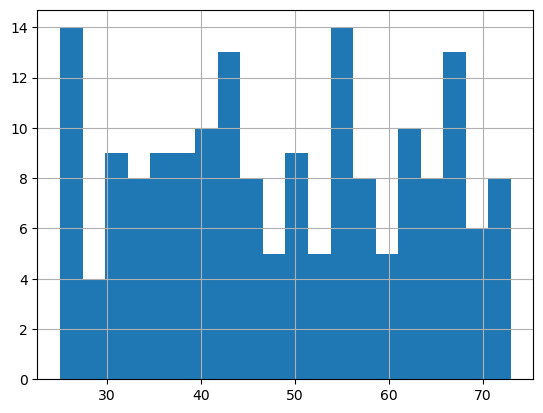

In [54]:
df_unido[(df_unido['genero']=='Masculino') & (df_unido['hobby']=='Praticar esporte')]['idade'].hist(bins=20)

### 9 - Qual é a proporção entre homens e mulheres que têm afinidade por cachorros e cultivam o hábito de ler livros?


In [63]:
df_unido[(df_unido['animal_estimacao']=='Cachorro') & (df_unido['hobby']=='Ler livros')]['genero'].value_counts(normalize=True) * 100

genero
Masculino    70.27027
Feminino     29.72973
Name: proportion, dtype: float64

### 10 - Qual é a desvio padrão das idades das pessoas que têm o hábito de assistir TV como hobby?

In [64]:
df_unido[(df_unido['hobby']=='Assistir TV')]['idade'].std()

14.345856108856259

### 11 - Qual dos scripts abaixo é utilizado para recuperar o número total de pessoas que responderam à pesquisa e indicaram que gostam de cachorros?

In [118]:
con.sql("""
select ae.animal_estimacao, count(0) total
from tb_pesquisa p
inner join tb_animal_estimacao ae
on p.cod_animal_estimacao = ae.cod_animal_estimacao
where ae.animal_estimacao = 'Cachorro'
group by ae.animal_estimacao
""")

┌──────────────────┬───────┐
│ animal_estimacao │ total │
│     varchar      │ int64 │
├──────────────────┼───────┤
│ Cachorro         │   259 │
└──────────────────┴───────┘

In [119]:
con.close()